In [3]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-09-17 11:44:44--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-09-17 11:44:44--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   312MB/s    in 

In [4]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'King', 'Bishop', 'Pawn', 'Knight', 'Queen']

In [6]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


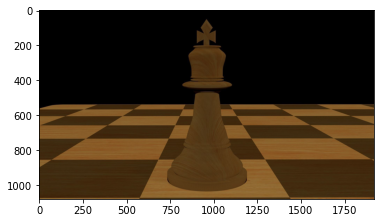

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              batch_size=128,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 32s - loss: 1.2994 - accuracy: 0.4790 - val_loss: 1.5772 - val_accuracy: 0.3269 - 32s/epoch - 513ms/step
Epoch 2/50
63/63 - 30s - loss: 1.2964 - accuracy: 0.4790 - val_loss: 1.4650 - val_accuracy: 0.3846 - 30s/epoch - 480ms/step
Epoch 3/50
63/63 - 32s - loss: 1.2642 - accuracy: 0.5130 - val_loss: 1.4227 - val_accuracy: 0.3654 - 32s/epoch - 501ms/step
Epoch 4/50
63/63 - 30s - loss: 1.1755 - accuracy: 0.5311 - val_loss: 1.4987 - val_accuracy: 0.4231 - 30s/epoch - 480ms/step
Epoch 5/50
63/63 - 30s - loss: 1.2084 - accuracy: 0.5611 - val_loss: 1.2650 - val_accuracy: 0.5000 - 30s/epoch - 480ms/step
Epoch 6/50
63/63 - 31s - loss: 1.1175 - accuracy: 0.5691 - val_loss: 1.5866 - val_accuracy: 0.3654 - 31s/epoch - 497ms/step
Epoch 7/50
63/63 - 30s - loss: 1.1337 - accuracy: 0.5571 - val_loss: 1.4261 - val_accuracy: 0.4808 - 30s/epoch - 479ms/step
Epoch 8/50
63/63 - 30s - loss: 0.9840 - accuracy: 0.6433 - val_loss: 1.5078 - val_accuracy: 0.3462 - 30s/epoch - 482ms/step
Epoch 9/

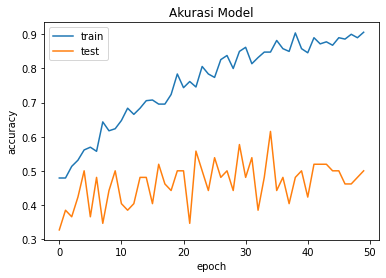

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

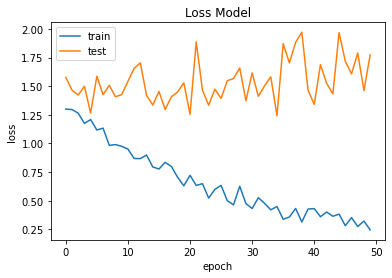

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()